In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [10]:
import sys
sys.path.append("../")
from logic.iterators import Skeleton
import data_collection.skeletonnormalization as sn
import data_collection.get_data as gd
from data_collection.find_r import *

In [11]:
train = gd.load_data('../pickles/train.p')
# a08_s01_e01_skeleton_proj.txt         hands raised over head
# a10_s06_e02_skeleton_proj.txt         wave
action_data = train["a08_s01_e01_skeleton_proj.txt"]
# print(np.array(action_data).shape)
# print(np.array(action_data)[0,:,:].shape) # frame 1

def get_frame(frame, data):
    return np.array(data)[frame - 1,:,1:]

In [12]:
# normalize data

R = gd.load_data('../pickles/r.p')
# get data from the first frame
frame_data = get_frame(60, action_data)
skele = Skeleton(frame_data)

print(' frame data shape:', frame_data.shape)     
print(' join num| x     | y    |  z\n',frame_data[0])

 frame data shape: (20, 4)
 join num| x     | y    |  z
 [ 1.    -0.081 -0.324  2.403]


<IPython.core.display.Javascript object>


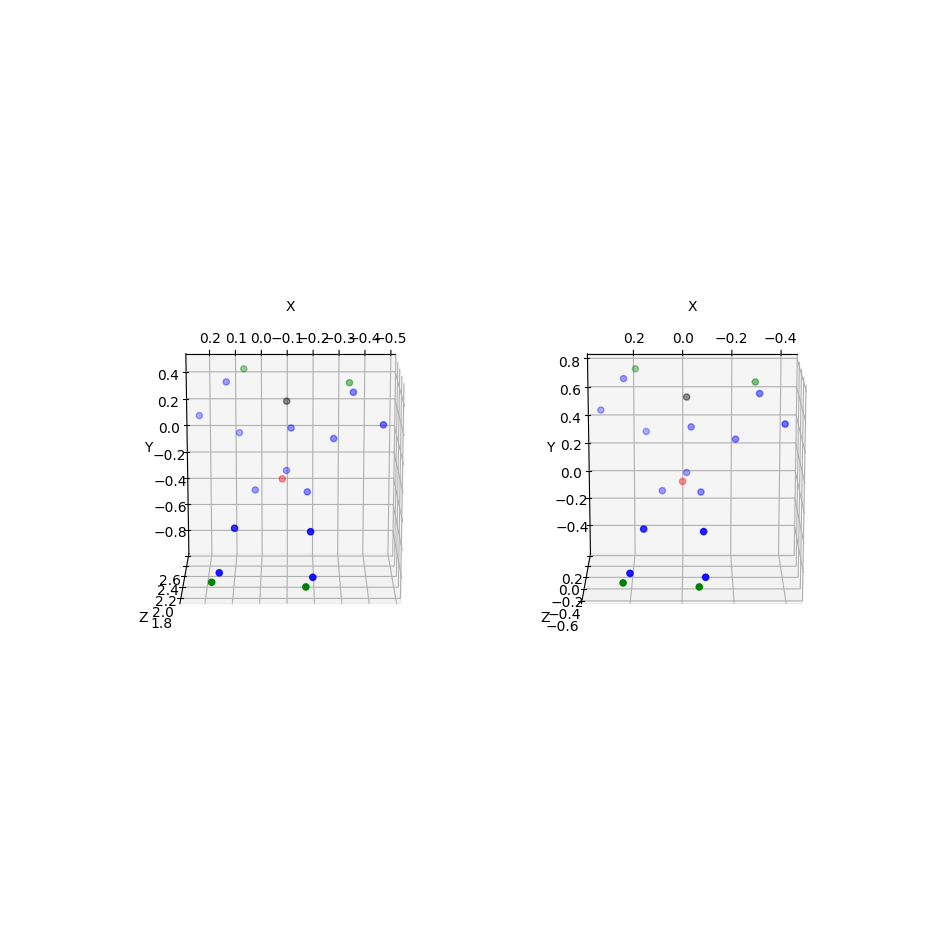

In [13]:
norm_skele = sn.normalize_skeleton(frame_data, R)
xs_norm, ys_norm, zs_norm = norm_skele[:,0], norm_skele[:,1], norm_skele[:,2]
xs, ys, zs = frame_data[:,1], frame_data[:,2], frame_data[:,3]

colors = ['blue' for i in range(20)]
colors[0] = 'red'  # hip is red
colors[7] = 'green'  # hands and feet are green
colors[11] = 'green'
colors[15] = 'green'
colors[19] = 'green'
colors[3] = 'black' # head is black

fig = plt.figure()
fig.set_size_inches(9.5, 9.5)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
scatter_1 = ax.scatter(xs, ys, zs, color=colors, label='Raw Skeleton Data')
ax.view_init(-75,  90)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
scatter_2 = ax.scatter(xs_norm, ys_norm, zs_norm, color=colors, label='Normalized Skeleton Data')
ax.view_init(-75,  90)

plt.show()

<IPython.core.display.Javascript object>


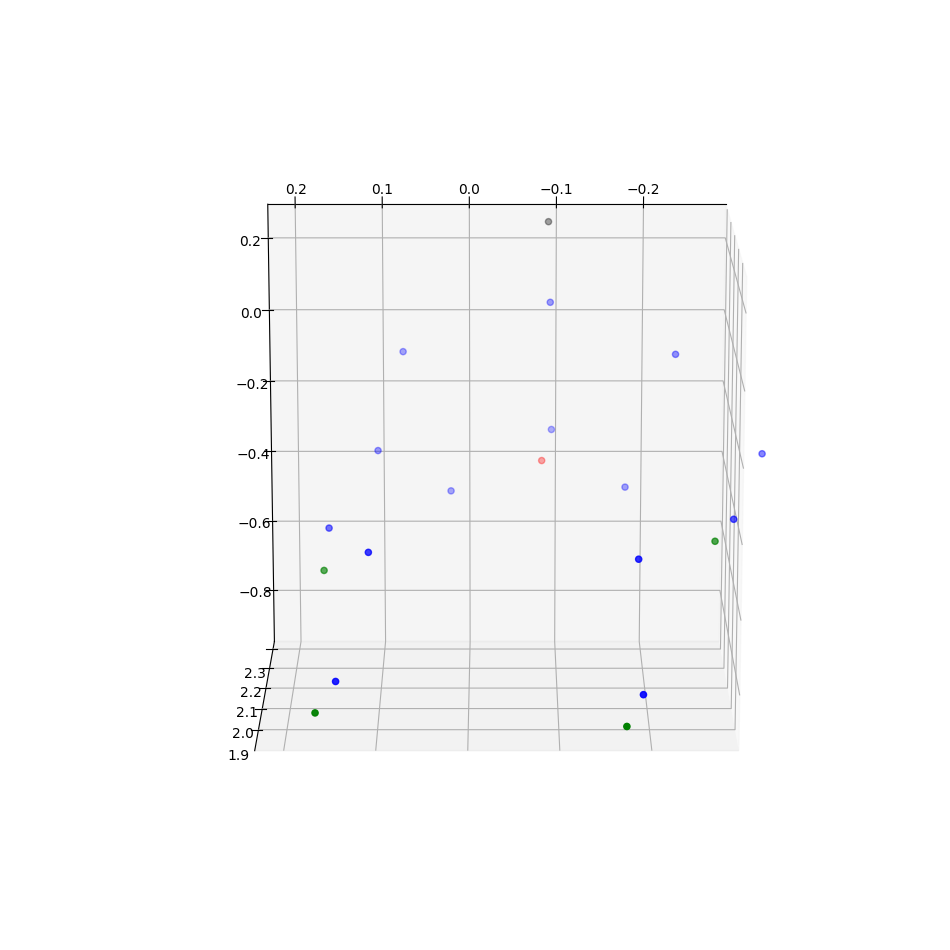

In [14]:
import matplotlib.animation

all_frames = [np.array(i)[:,2:] for i in action_data]
max_frame = len(all_frames)

def update_graph(frame_data):
    xs, ys, zs = frame_data[:,0], frame_data[:,1], frame_data[:,2]
    graph._offsets3d = (xs, ys, zs)
    return graph
    

fig = plt.figure()
fig.set_size_inches(9.5, 9.5)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(-75,  90)

points = all_frames[0]
graph = ax.scatter(points[:,0], points[:,1], points[:,2], color=colors)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, all_frames, interval=90)



In [15]:
# get data from the first frame
frame_data = get_frame(1, action_data)
# skele = Skeleton(frame_data)
# for i in skele:
#     print(i)

In [20]:
# normalize data
R = list(gd.load_data("../pickles/r.p"))
norm_skele = sn.normalize_skeleton(frame_data, R)
xs_norm, ys_norm, zs_norm = norm_skele[:,0], norm_skele[:,1], norm_skele[:,2]

<IPython.core.display.Javascript object>


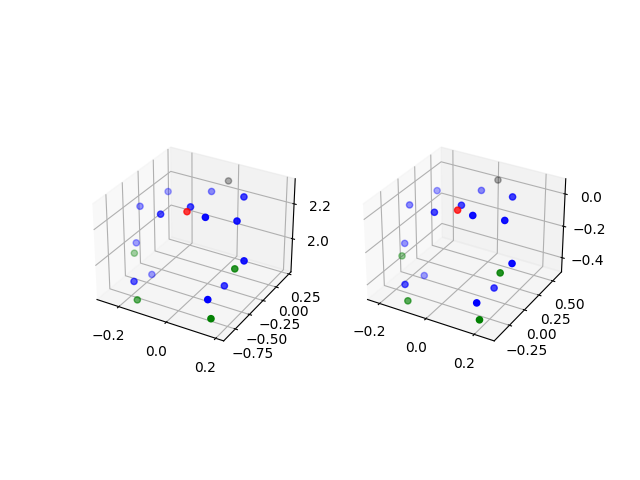

In [21]:
colors = ['blue' for i in range(20)]
colors[0] = 'red'  # hip is red
colors[7] = 'green'  # hands and feet are green
colors[11] = 'green'
colors[15] = 'green'
colors[19] = 'green'
colors[3] = 'black' # head is black

xs, ys, zs = frame_data[:, 1], frame_data[:, 2], frame_data[:, 3]
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs, ys, zs, color=colors)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs_norm, ys_norm, zs_norm, color=colors)
plt.show()

<IPython.core.display.Javascript object>


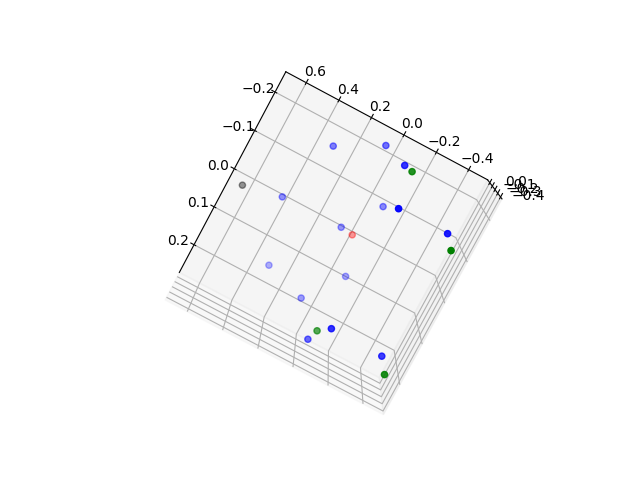

In [22]:
hip_zero = sn.zero_to_hip(frame_data)
xs_h, ys_h, zs_h = hip_zero[:,1], hip_zero[:,2], hip_zero[:,3]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs_h,ys_h,zs_h,color=colors)
# normalization to hip works as expected